### AIT580 Spring 2022 - Assignment 12
#### Tuan Nguyen
#### G01346722

In [9]:
#Import libraries
from bs4 import BeautifulSoup
import urllib
import csv
import pandas as pd
import matplotlib.pyplot as plt

print('done')

done


#### 1. Write Python code using the BeautifulSoup package to generate the csv output file:

In [10]:
URL = "https://repo.vse.gmu.edu/ait/AIT580/580books.html"

source = urllib.request.urlopen(URL).read()

soup = BeautifulSoup(source,'lxml')

In [11]:
#Extract texts from 'li' container to a list

literature = []
#titles = []
#authors = []
#dates = []
#pubs = []

for li in (soup.find_all('li')):
    temp = []
    temp.append(li.text)
    literature.append(temp)
    #titles.append(li.booktitle.text)
    #authors.append(li.author.text)
    #pubs.append(li.publisher.text)
    #dates.append(li.release.text)
    
#print(titles,authors,pubs,dates)
#print(len(titles),len(authors),len(pubs),len(dates))

print(literature)

[["Learning Python; Mark Lutz; O'Reilly Media; June 2013"], ["Web Scraping with Python; Ryan Mitchell; O'Reilly Media; November 2017"], ['Python Coding for Kids; Don Wilcher; Maker Media, Inc; September 2017'], ['Python Machine Learning By Example; Yuxi Liu; Packt Publishing; May 2017'], ['Python Data Structures and Algorithms; Benjamin Baka; Packt Publishing; May 2017'], ["Python in a Nutshell; Alex Martelli, Anna Ravenscroft, Steve Holden; O'Reilly Media; April 2017"], ['Invent Your Own Computer Games with Python; Al Sweigart; No Starch Press; December 2016'], ["Head First Python; Paul Barry; O'Reilly Media; November 2016"], ['Integrating Python with Leading Computer Forensics Platforms; Chet Hosmer; Elsevier / Syngress; September 2016'], ['Data Science Essentials in Python; Dmitry Zinoviev; Pragmatic Bookshelf; August 2016']]


In [12]:
#Create csv file

filepath = "D:/Work/GMU -US/Spring 2022/AIT 580/Nguyen_AIT580/Assignment12/PyBook.csv"

with open(filepath, 'w', newline='') as myfile:
     writer = csv.writer(myfile,quoting=csv.QUOTE_ALL)
     writer.writerows(literature)

#### 2. Read the output csv file from part 1 and write python code to answer questions:

In [13]:
#Read and transform csv into dataframe

df = pd.read_csv(filepath, header = None)
df1 = df[0].str.split(";", expand=True)
df1.columns = ['Title', 'Authors', 'Publishers', 'Release Date']
df1.head()

,Title,Authors,Publishers,Release Date
0,Learning Python,Mark Lutz,O'Reilly Media,June 2013
1,Web Scraping with Python,Ryan Mitchell,O'Reilly Media,November 2017
2,Python Coding for Kids,Don Wilcher,"Maker Media, Inc",September 2017
3,Python Machine Learning By Example,Yuxi Liu,Packt Publishing,May 2017
4,Python Data Structures and Algorithms,Benjamin Baka,Packt Publishing,May 2017


##### a. Print the frequency count for publishers

In [14]:
#Get the publisher title count for each publisher
chart1 = df1.groupby('Publishers').count()
print(chart1)

                      Title  Authors  Release Date
Publishers                                        
 Elsevier / Syngress      1        1             1
 Maker Media, Inc         1        1             1
 No Starch Press          1        1             1
 O'Reilly Media           4        4             4
 Packt Publishing         2        2             2
 Pragmatic Bookshelf      1        1             1


##### b. Visualize the output of (a) using a chart

In [15]:
#Insert the publisher row name as new column
chart1.index.name = 'Publishers'
chart1.reset_index(inplace=True)
chart1

,Publishers,Title,Authors,Release Date
0,Elsevier / Syngress,1,1,1
1,"Maker Media, Inc",1,1,1
2,No Starch Press,1,1,1
3,O'Reilly Media,4,4,4
4,Packt Publishing,2,2,2
5,Pragmatic Bookshelf,1,1,1


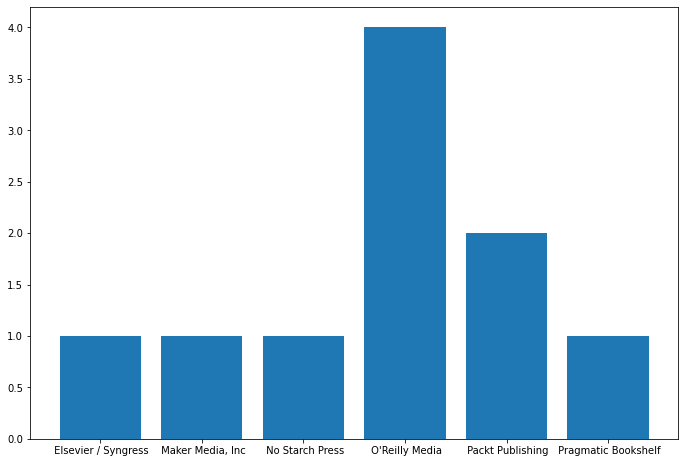

In [16]:
#Plot a bar chart with x = publisher and y = number of title
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
pubs = chart1['Publishers']
titl = chart1['Title']
ax.bar(pubs,titl)
plt.show()

##### c. Print the frequency count for year of publication

In [17]:
#Split the Release Date column into a new dataframe with 3 columns for index, Month and year
df2 = df1['Release Date'].str.split(" ", expand=True)
df2.columns = ['Index','Month','Year']
df2.head()

,Index,Month,Year
0,,June,2013
1,,November,2017
2,,September,2017
3,,May,2017
4,,May,2017


In [18]:
#Repeat the same procedure for previous chart
#This show the frequency of titles for each year

chart2 = df2.groupby('Year').count()
chart2.index.name = 'Year'
chart2.reset_index(inplace=True)
print(chart2)

   Year  Index  Month
0  2013      1      1
1  2016      4      4
2  2017      5      5


##### d. Visualize the output of (b) using a chart

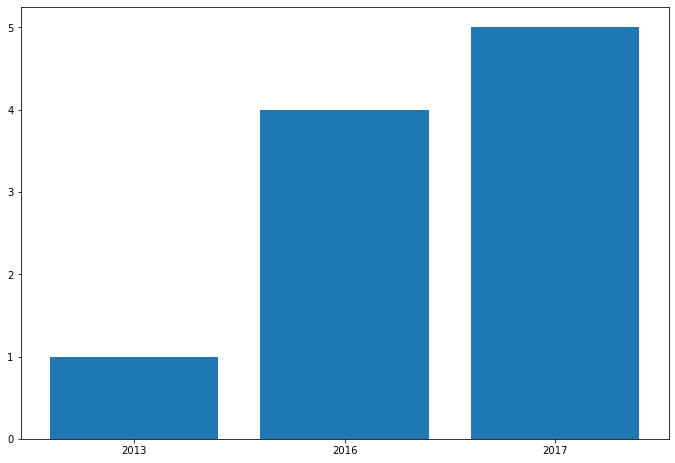

In [19]:
#Create chart
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1.5,1.5])
year = chart2['Year']
title = chart2['Index']
ax.bar(year,title)
plt.show()